<a href="https://colab.research.google.com/github/BennamatAbdelbassit/Deep-Learning/blob/master/Traffic_Signs_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Project Overview


![alt text](http://drive.google.com/uc?export=view&id=1nzr_ce5W4qwCG56mXw4-o6srne6qtuxz)

![alt text](http://drive.google.com/uc?export=view&id=1mSnf3JlJmCe87jZEn8CWI3kMzp6rYbPH)

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


#2- Import Libraries and Datasets

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

![alt text](http://drive.google.com/uc?export=view&id=1ymVCBWDx_O0rPZIk8T1BYYhTXTppZBNq)

In [0]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [14]:
X_train.shape

(34799, 32, 32, 3)

In [15]:
y_train.shape

(34799,)

In [16]:
X_validation.shape

(4410, 32, 32, 3)

In [17]:
X_test.shape

(12630, 32, 32, 3)

#3- Images Visualization

3

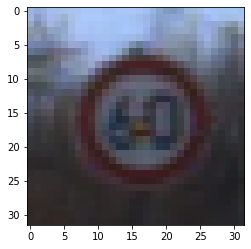

In [21]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

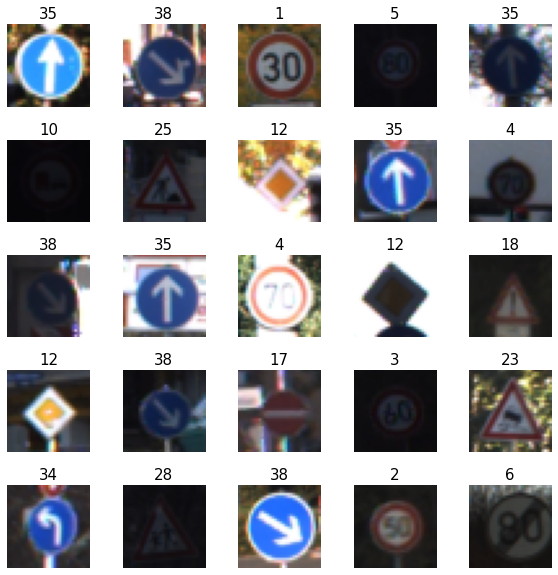

In [22]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)
        

#4- Convert Images to grayscale and perform normalization

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [25]:
X_train_gray.shape

(34799, 32, 32, 1)

In [0]:
X_train_gray_norm = (X_train_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [56]:
X_valid_gray_norm.shape

(4410, 32, 32, 1)

In [62]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

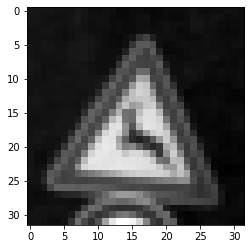

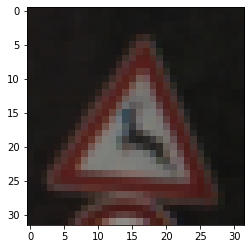

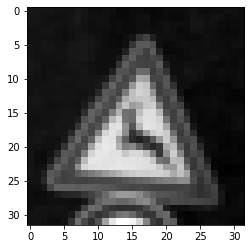

In [28]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#5 The theory and intuition behind CNNs

![alt text](http://drive.google.com/uc?export=view&id=1DgYvXuua_VfbOOHX2DBmxWZHB5JdTy9m)

![alt text](http://drive.google.com/uc?export=view&id=14KWAD9BFTcjmGQk0pQc0P_JQz7IQEnGq)

#6- Build our deep CNN model

In [177]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.46))

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))
CNN.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_35 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_36 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 120)             

#7- Compile and train our CNN model

In [0]:
CNN.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [179]:
history = CNN.fit(x= X_train_gray_norm, 
                  y= y_train, 
                  batch_size=500,
                  epochs = 50,
                  verbose = 1, 
                  validation_data = (X_valid_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 9ms/step - loss: 3.3055 - accuracy: 0.1381 - val_loss: 3.1000 - val_accuracy: 0.2211
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 2.3486 - accuracy: 0.3626 - val_loss: 1.9165 - val_accuracy: 0.4966
Epoch 3/50
70/70 [==============================] - 1s 8ms/step - loss: 1.4364 - accuracy: 0.5786 - val_loss: 1.1244 - val_accuracy: 0.6694
Epoch 4/50
70/70 [==============================] - 1s 8ms/step - loss: 0.9898 - accuracy: 0.7014 - val_loss: 0.8441 - val_accuracy: 0.7601
Epoch 5/50
70/70 [==============================] - 1s 8ms/step - loss: 0.8031 - accuracy: 0.7581 - val_loss: 0.7100 - val_accuracy: 0.8073
Epoch 6/50
70/70 [==============================] - 1s 8ms/step - loss: 0.6886 - accuracy: 0.7932 - val_loss: 0.6572 - val_accuracy: 0.8125
Epoch 7/50
70/70 [==============================] - 1s 8ms/step - loss: 0.6005 - accuracy: 0.8221 - val_loss: 0.5744 - val_accuracy: 0.8444
Epoch 8/50
70/70 [==

#8- CNN model performance 

![alt text](http://drive.google.com/uc?export=view&id=1nZMfCow6pAG9WwQUdyrTzSOxNKp1gaoF)

In [180]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.9150
Test Accuracy: 0.9150435328483582


In [181]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

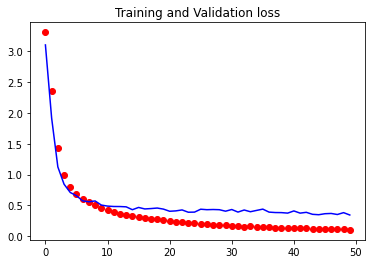

In [183]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

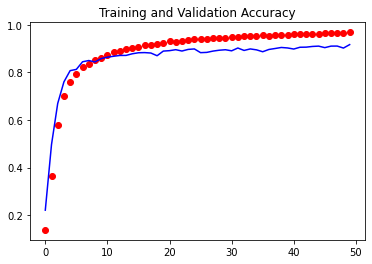

In [184]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

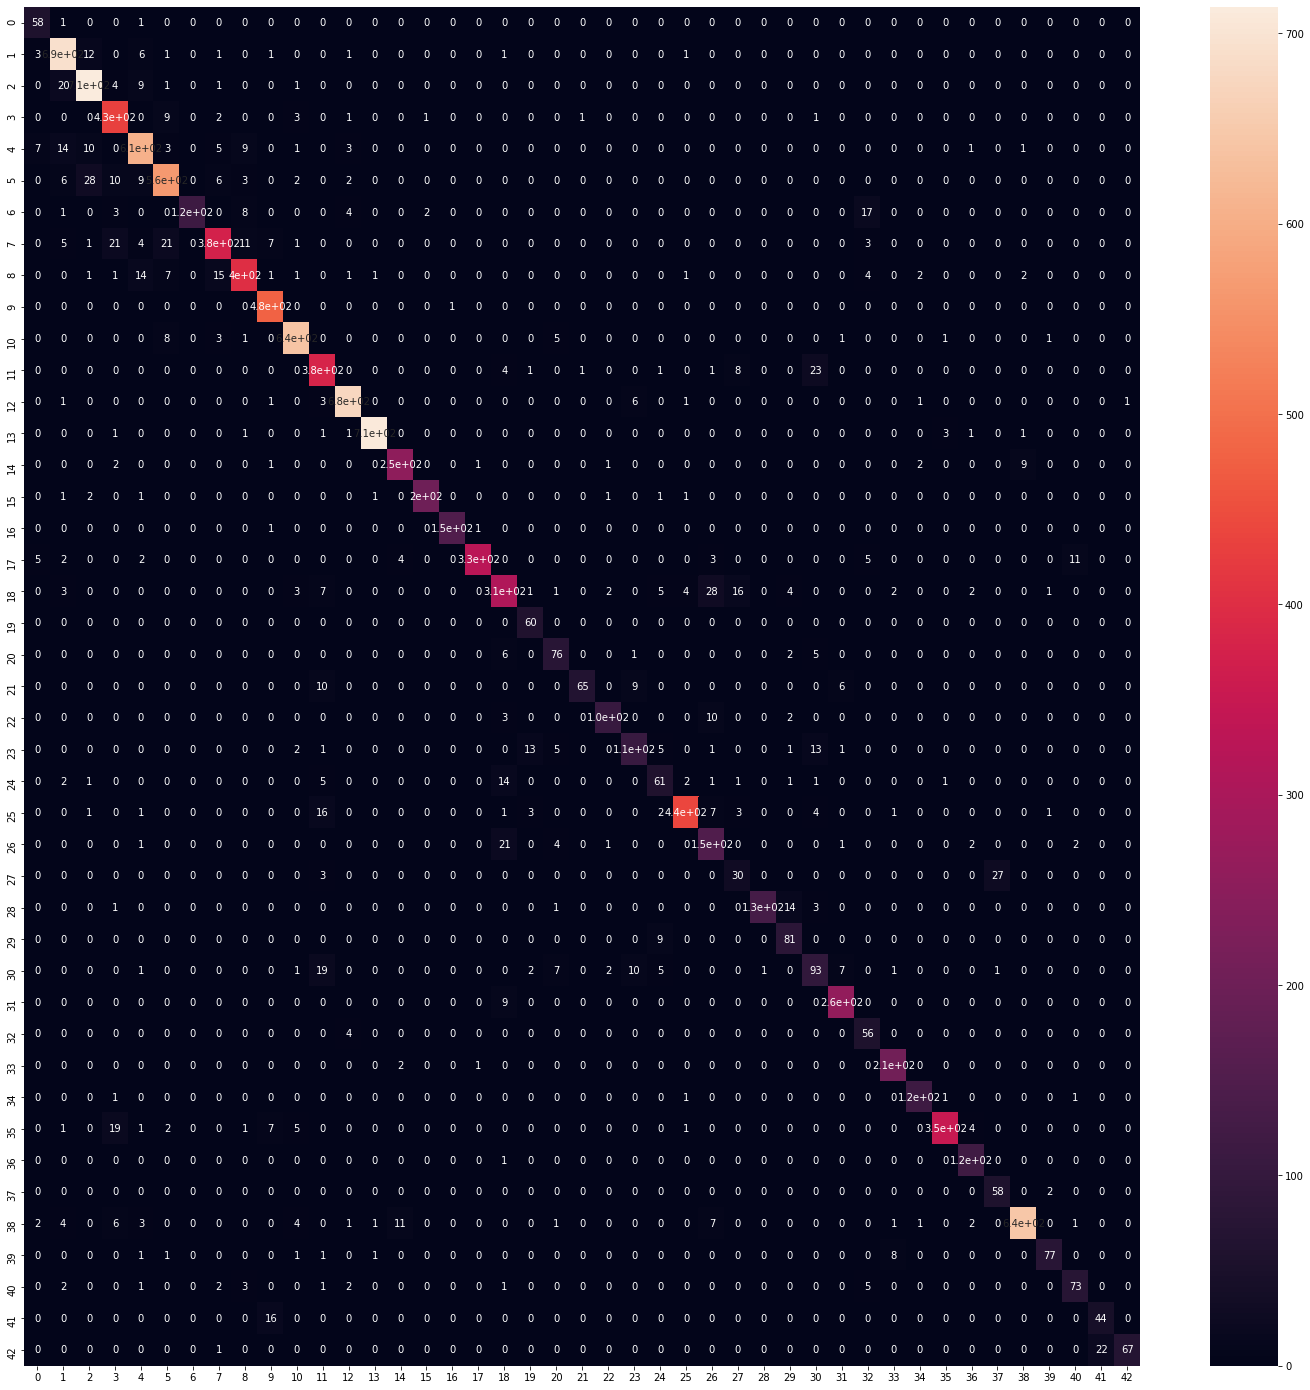

In [185]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

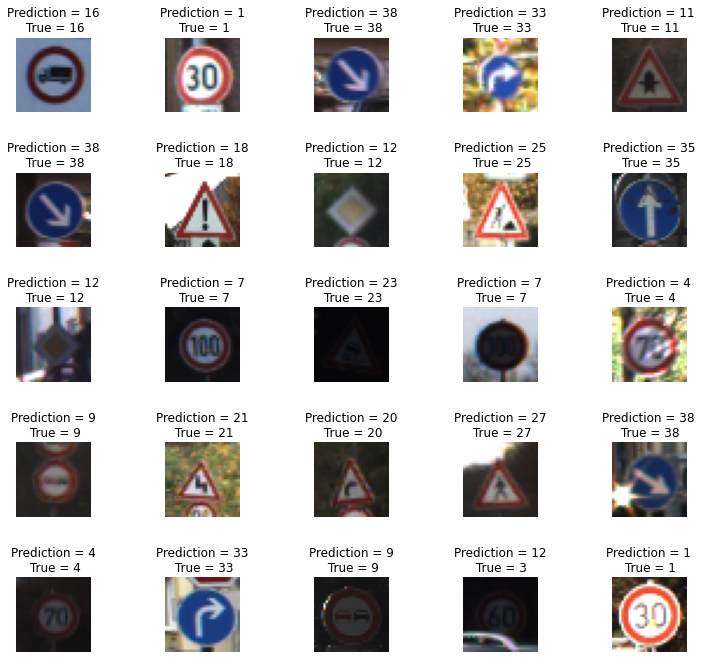

In [186]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    